<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/01%20Machine%20Learning%20and%20Neurons/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv').values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

X = X - X.mean()
y = np.log(y)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 532.7015
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 405.5879
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 331.3121
Epoch 4/100
6/6 [==============================] - 0s 849us/step - loss: 668.5106
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 605.1957
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 413.5950
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 244.9704
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 149.6864
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 74.1460
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 41.6996
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 63.0560
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 59.3174
Epoch 13/100
6/6 [=====================

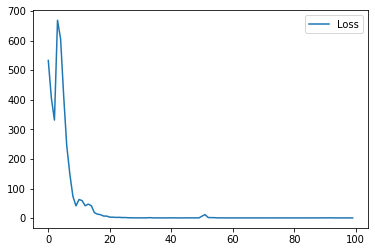

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y, epochs=100, callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 1.9354719468419108


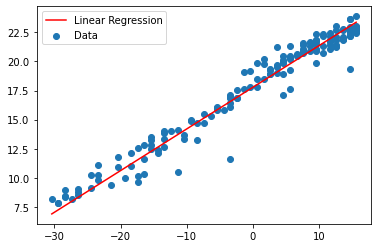

In [ ]:
a = model.layers[0].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y, label='Data')
plt.plot(X_hat, y_hat, color='red', label='Linear Regression')
plt.legend()
plt.show()